In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import mlfinlab as ml

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 13,6

In [ ]:
clean_data_path = "./data/processed/clean_IVE_tickbidask.parq"
df = pd.read_parquet(clean_data_path)

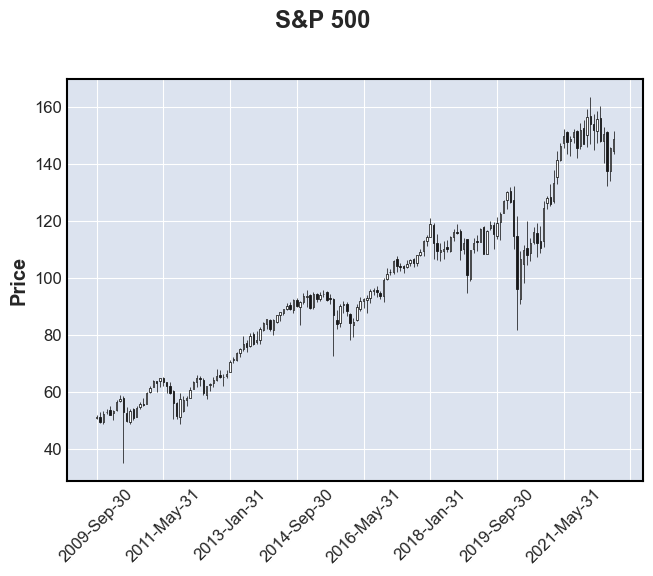

In [ ]:
import mplfinance as mpf
from datetime import datetime

df_ohlc = df.price.resample('1M').ohlc()
mpf.plot(df_ohlc, 
         type='candle',
         title='S&P 500')


2.1 On a series of E-mini S&P 500 futures tick data:

(a) Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.

In [ ]:
df = df.reset_index()
df.drop(['bid', 'ask', 'dollar_vol'], axis=1, inplace=True)
df.rename(columns={'date': 'date_time', 'vol':'volume'}, inplace=True)
df

,date_time,price,volume
0,2009-09-28 09:30:00,50.79,100
1,2009-09-28 09:30:00,50.71,638
2,2009-09-28 09:31:32,50.75,100
3,2009-09-28 09:31:33,50.75,100
4,2009-09-28 09:31:33,50.75,100
...,...,...,...
6749865,2022-08-25 15:59:58,148.66,100
6749866,2022-08-25 15:59:58,148.64,100
6749867,2022-08-25 15:59:59,148.64,100
6749868,2022-08-25 16:00:00,148.62,47015


In [ ]:
dollar_bar = ml.data_structures.get_dollar_bars(df, 1_000_000, 10, False)
dollar_bar

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:46:35,64,50.79,51.070,50.710,51.070,20044,13464,64,1.020582e+06
1,2009-09-28 09:53:49,116,51.07,51.150,51.050,51.130,19724,15474,52,1.007758e+06
2,2009-09-28 09:54:40,148,51.14,51.140,51.129,51.140,20051,12751,32,1.025308e+06
3,2009-09-28 10:00:38,205,51.14,51.210,51.080,51.210,19736,14247,57,1.009192e+06
4,2009-09-28 10:02:52,247,51.21,51.260,51.200,51.260,19554,17754,42,1.002096e+06
...,...,...,...,...,...,...,...,...,...,...
157816,2022-08-25 15:57:52,6749725,148.49,148.560,148.485,148.540,6901,3901,39,1.024920e+06
157817,2022-08-25 15:58:30,6749759,148.54,148.540,148.510,148.520,6830,1300,34,1.014422e+06
157818,2022-08-25 15:59:17,6749803,148.52,148.580,148.520,148.550,6899,3852,44,1.024832e+06
157819,2022-08-25 15:59:50,6749848,148.55,148.595,148.540,148.595,6982,3081,45,1.037241e+06


In [ ]:
tick_bar = ml.data_structures.get_tick_bars(df, 10, 100, False)
tick_bar

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:32:06,10,50.7900,50.7900,50.7100,50.78,2538,1800,10,1.288090e+05
1,2009-09-28 09:34:58,20,50.8226,50.8226,50.8000,50.80,2498,1498,10,1.269376e+05
2,2009-09-28 09:38:32,30,50.8000,50.8500,50.8000,50.81,2761,466,10,1.403115e+05
3,2009-09-28 09:43:02,40,50.8100,50.8500,50.7833,50.84,1447,600,10,7.353612e+04
4,2009-09-28 09:45:03,50,50.8700,51.0200,50.8700,51.02,3772,3772,10,1.921104e+05
...,...,...,...,...,...,...,...,...,...,...
674982,2022-08-25 15:59:36,6749830,148.5400,148.5500,148.5400,148.54,1515,300,10,2.250411e+05
674983,2022-08-25 15:59:45,6749840,148.5700,148.5900,148.5700,148.58,1432,732,10,2.127619e+05
674984,2022-08-25 15:59:50,6749850,148.5700,148.6000,148.5700,148.60,1482,1082,10,2.202084e+05
674985,2022-08-25 15:59:53,6749860,148.6000,148.6200,148.6000,148.62,2083,1389,10,3.095467e+05


In [ ]:
volume_bar = ml.data_structures.get_volume_bars(df, 10_000, 100, False)
volume_bar

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2009-09-28 09:44:09,43,50.790,50.910,50.710,50.91,10744,5864,43,5.459432e+05
1,2009-09-28 09:46:35,65,50.910,51.070,50.910,51.07,12600,10900,22,6.431700e+05
2,2009-09-28 09:52:32,104,51.070,51.148,51.050,51.13,10024,8874,39,5.119968e+05
3,2009-09-28 09:53:49,120,51.101,51.150,51.101,51.14,10751,7651,16,5.497398e+05
4,2009-09-28 09:54:38,142,51.130,51.130,51.129,51.13,10000,2700,22,5.112999e+05
...,...,...,...,...,...,...,...,...,...,...
161871,2022-08-25 15:57:04,6749673,148.380,148.480,148.380,148.48,10032,5883,51,1.489143e+06
161872,2022-08-25 15:57:42,6749716,148.480,148.530,148.470,148.53,10021,4601,43,1.488053e+06
161873,2022-08-25 15:58:42,6749768,148.540,148.560,148.510,148.54,10030,2600,52,1.489749e+06
161874,2022-08-25 15:59:39,6749832,148.540,148.580,148.520,148.58,10067,4519,64,1.495450e+06


In [ ]:
dollar_bar.to_parquet("./data/processed/ml_SP500_dollar_bar.parq")
tick_bar.to_parquet("./data/processed/ml_SP500_tick_bar.parq")
volume_bar.to_parquet("./data/processed/ml_SP500_volume_bar.parq")

In [ ]:
dollar_bar = pd.read_parquet("./data/processed/ml_SP500_dollar_bar.parq")
tick_bar = pd.read_parquet("./data/processed/ml_SP500_tick_bar.parq")
volume_bar = pd.read_parquet("./data/processed/ml_SP500_volume_bar.parq")

In [ ]:
dollar_bar = dollar_bar.set_index('date_time')
tick_bar = tick_bar.set_index('date_time')
volume_bar = volume_bar.set_index('date_time')

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

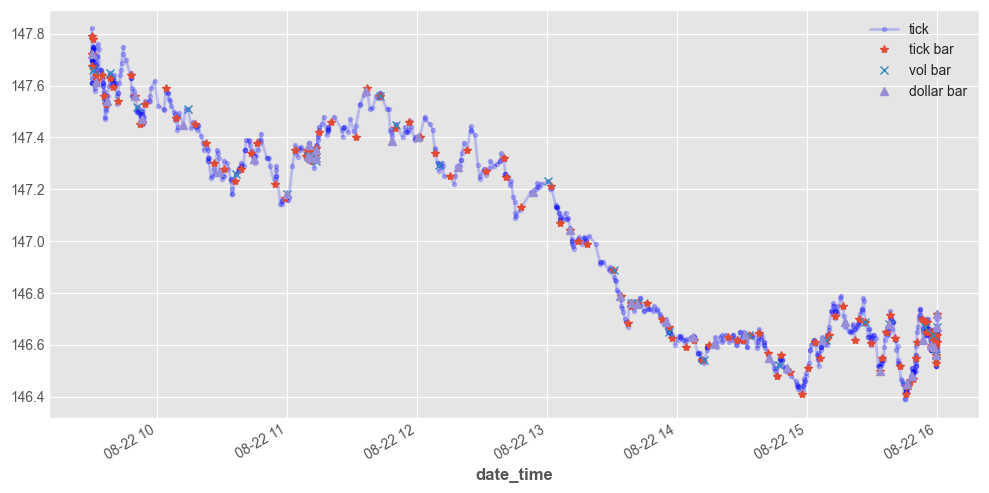

In [ ]:
s_date = '2022-08-20 08:00:00'
e_date = '2022-08-22 17:00:00'


df.loc[s_date:e_date].price.plot(marker='o', ms=3, color='b', alpha=0.2, label='tick')
tick_bar.loc[s_date:e_date].close.plot(marker='*', ls='', label='tick bar')
volume_bar.loc[s_date:e_date].close.plot(marker='x', ls='', label='vol bar')
dollar_bar.loc[s_date:e_date].close.plot(marker='^', ls='', label='dollar bar')

plt.legend()

(b) Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time series of that bar count. What bar type produces the most stable weekly count? Why?

In [ ]:
weekly_tick_count = tick_bar.close.resample('1W').count()
weekly_vol_count = volume_bar.close.resample('1W').count()
weekly_dollar_count = dollar_bar.close.resample('1W').count()

In [ ]:
count_df = pd.DataFrame(columns=['count_mean', 'count_std'], index=['tick', 'vol', 'dollar'])
count_df.loc['tick'] = [weekly_tick_count.mean(), weekly_tick_count.std()]
count_df.loc['vol'] = [weekly_vol_count.mean(), weekly_vol_count.std()]
count_df.loc['dollar'] = [weekly_dollar_count.mean(), weekly_dollar_count.std()]

count_df

,count_mean,count_std
tick,1001.464392,602.68388
vol,240.172107,133.577142
dollar,234.155786,153.925517


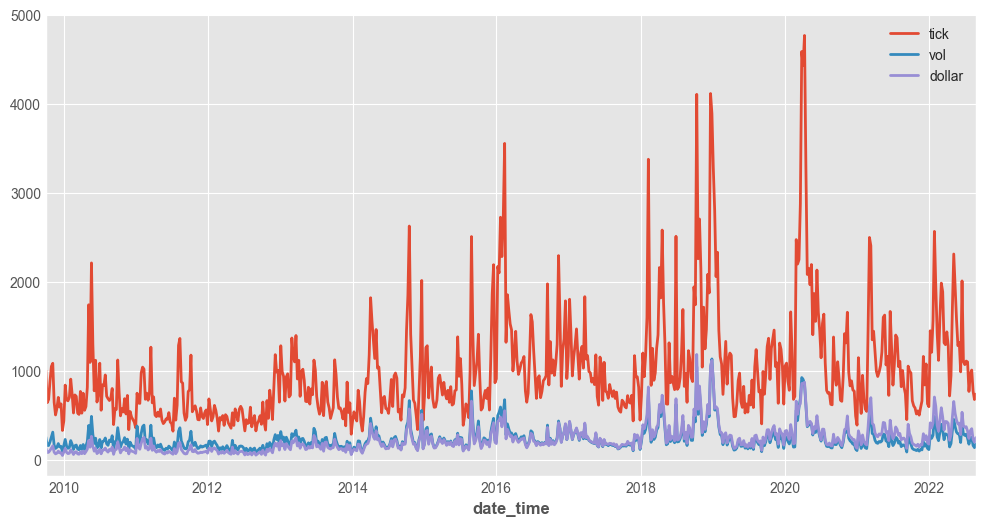

In [ ]:
fig, ax = plt.subplots(1)
weekly_tick_count.plot(ax=ax)
weekly_vol_count.plot(ax=ax)
weekly_dollar_count.plot(ax=ax)
ax.legend(['tick', 'vol', 'dollar'])

In [ ]:
def scale(s):
  return (s-s.min())/(s.max() - s.min())

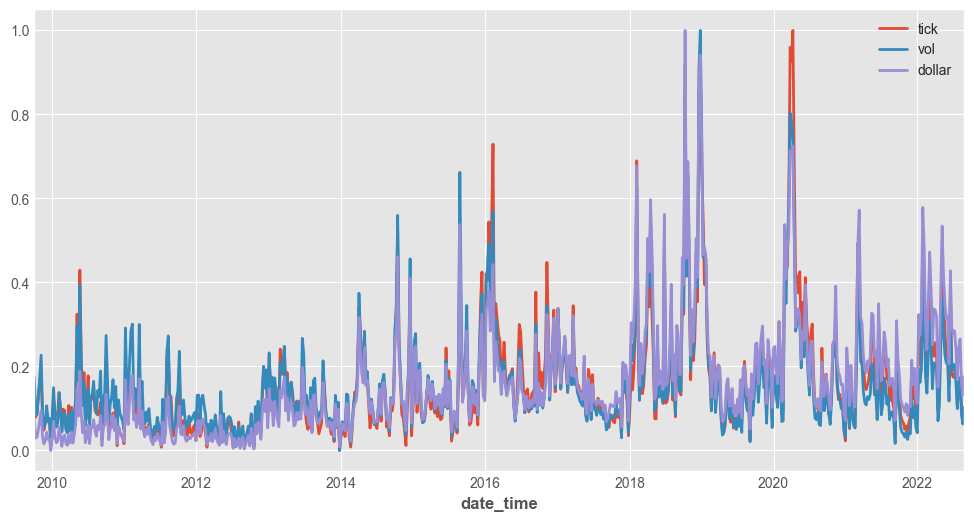

In [ ]:
fig, ax = plt.subplots(1)
scale(weekly_tick_count).plot(ax=ax)
scale(weekly_vol_count).plot(ax=ax)
scale(weekly_dollar_count).plot(ax=ax)
ax.legend(['tick', 'vol', 'dollar'])

(c) Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?

In [ ]:
# log returns
tick_returns = np.log(tick_bar.close).diff().dropna()
vol_returns = np.log(volume_bar.close).diff().dropna()
dollar_returns = np.log(dollar_bar.close).diff().dropna()

In [ ]:
returns_corr_df = pd.DataFrame(data={'returns_autocorr':[tick_returns.autocorr(), vol_returns.autocorr(), dollar_returns.autocorr()]},\
                               index=['tick', 'vol', 'dollar'])
returns_corr_df

,returns_autocorr
tick,-0.212873
vol,-0.089550
dollar,-0.001136


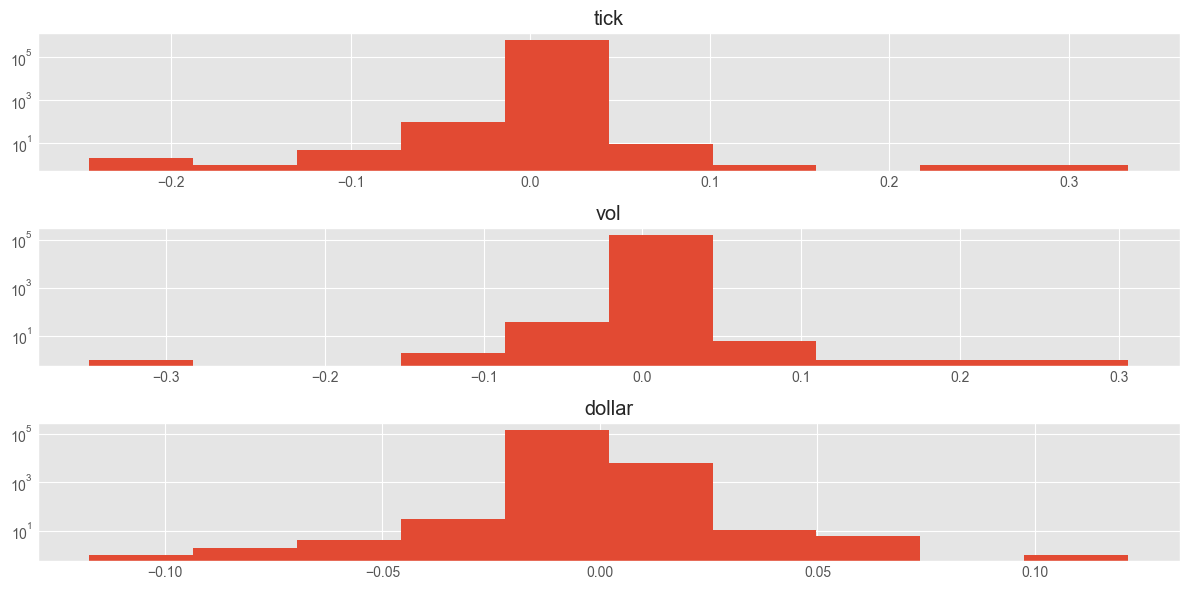

In [ ]:
#bins = np.arange(-0.6,0.6,0.01)
fig, ax = plt.subplots(3,1)
ax[0].hist(tick_returns)
ax[0].set_title('tick')
ax[1].hist(vol_returns)
ax[1].set_title('vol')
ax[2].hist(dollar_returns)
ax[2].set_title('dollar')
[a.set_yscale('log') for a in ax]
fig.tight_layout()


In [ ]:
import statsmodels.api as sm
def plot_autocorr(bar_types, bar_returns):
  f, axes = plt.subplots(len(bar_types))

  for i, (bar, typ) in enumerate(zip(bar_returns, bar_types)):
    sm.graphics.tsa.plot_acf(bar, lags=50, ax=axes[i], alpha=0.05, \
                             unbiased=True, fft=True, zero=False, \
                             title=f'{typ} AutoCorr', auto_ylims= True)
  plt.tight_layout()

C:\Users\User\AppData\Local\Temp\ipykernel_18204\3895745567.py:6: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  sm.graphics.tsa.plot_acf(bar, lags=50, ax=axes[i], alpha=0.05, \


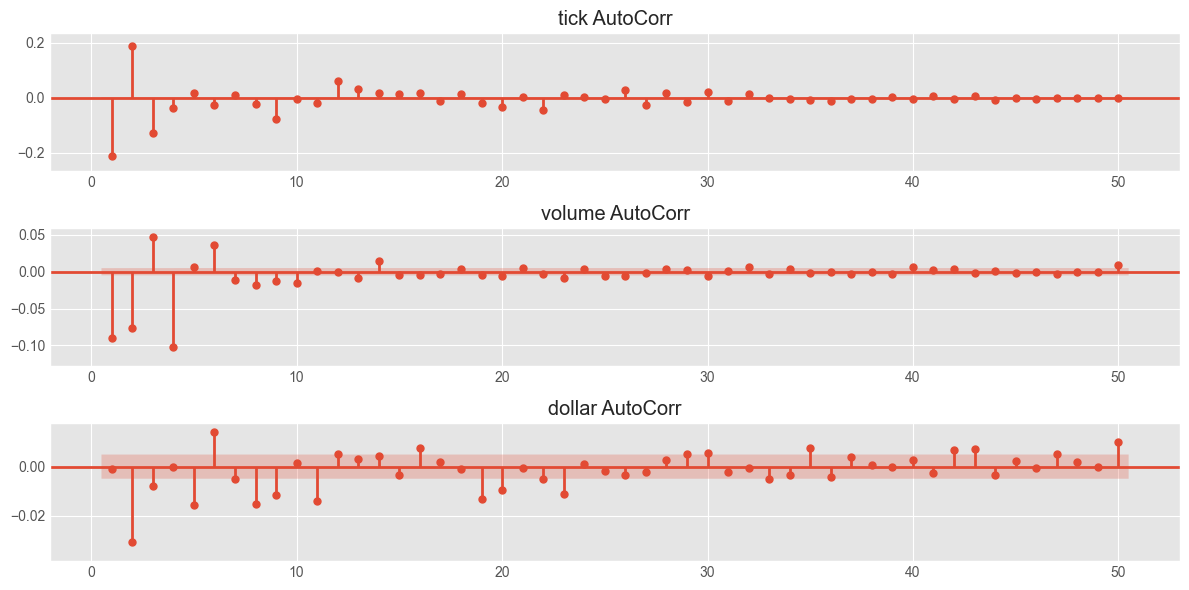

In [ ]:
bar_types = ['tick', 'volume', 'dollar']
bar_returns = [tick_returns, vol_returns, dollar_returns]
plot_autocorr(bar_types, bar_returns)

(d) Partition the bar series into monthly subsets. Compute the variance of returns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?

In [ ]:
monthly_tick_returns_var = tick_returns.resample('M').var()
monthly_vol_returns_var = vol_returns.resample('M').var()
monthly_dollar_returns_var = dollar_returns.resample('M').var()

In [ ]:
monthly_ret_var_df = pd.DataFrame(data={'monthly_returns_var' : [monthly_tick_returns_var.var(), \
                                                                 monthly_vol_returns_var.var(), \
                                                                 monthly_dollar_returns_var.var()]},\
                                  index=['tick', 'vol', 'dollar'])
monthly_ret_var_df

,monthly_returns_var
tick,2.374700e-11
vol,2.715476e-10
dollar,2.229681e-11


(e) Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

In [ ]:
from scipy.stats import jarque_bera

In [ ]:
jb_value_tick, _ =  jarque_bera(tick_returns)
jb_value_vol, _ =  jarque_bera(vol_returns)
jb_value_dollar, _ =  jarque_bera(dollar_returns)

In [ ]:
jb_test_df = pd.DataFrame(data={'jarque_bera_results' : [jb_value_tick, jb_value_vol, jb_value_dollar]}, \
                          index=['tick', 'vol', 'dollar'])
jb_test_df

,jarque_bera_results
tick,1.835550e+13
vol,4.914406e+11
dollar,2.072408e+09


In statistics, the Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. The test is named after Carlos Jarque and Anil K. Bera. The test statistic is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.

All the comparisons

In [ ]:
pd.concat([count_df, returns_corr_df, monthly_ret_var_df, jb_test_df], axis=1)

,count_mean,count_std,returns_autocorr,monthly_returns_var,jarque_bera_results
tick,1001.464392,602.68388,-0.212873,2.374700e-11,1.835550e+13
vol,240.172107,133.577142,-0.089550,2.715476e-10,4.914406e+11
dollar,234.155786,153.925517,-0.001136,2.229681e-11,2.072408e+09


In [ ]:
tick_standard = (tick_returns - tick_returns.mean()) / tick_returns.std()
volume_standard = (vol_returns - vol_returns.mean()) / vol_returns.std()
dollar_standard = (dollar_returns - dollar_returns.mean()) / dollar_returns.std()


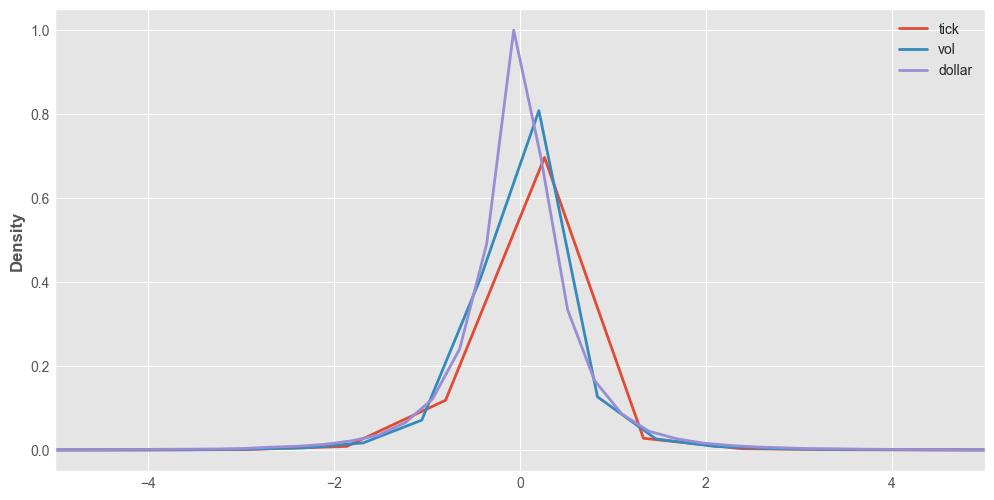

In [ ]:
fig, ax = plt.subplots(1,1)
tick_standard.plot.density(ax=ax, xlim=(-5,5))
volume_standard.plot.density(ax=ax, xlim=(-5,5))
dollar_standard.plot.density(ax=ax, xlim=(-5,5))
ax.legend(['tick', 'vol', 'dollar'])

c:\users\user\appdata\local\programs\python\python310\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python310\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\local\programs\python\python310\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\users\user\appdata\loc

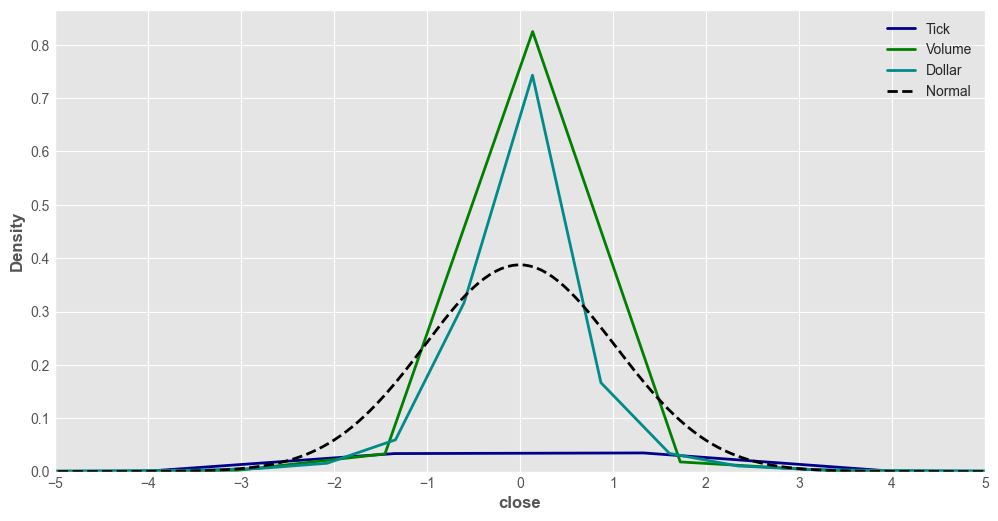

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
sns.kdeplot(tick_standard, ax=ax, label='Tick', bw=0.25, color='darkblue')
sns.kdeplot(volume_standard, ax=ax, label='Volume', bw=0.25, color='green')
sns.kdeplot(dollar_standard, ax=ax, label='Dollar', bw=0.25, color='darkcyan')
sns.kdeplot(np.random.normal(size=len(tick_standard)), ax=ax, label='Normal', bw=0.25, linestyle='--', color='black')
ax.set_xticks(range(-5, 6))
ax.set_xlim(-5,5)
ax.legend()

2.2 On a series of E-mini S&P 500 futures tick data, compute dollar bars and dollar imbalance bars. What bar type exhibits greater serial correlation? Why?

In [ ]:
df = pd.read_parquet(clean_data_path)

In [ ]:
imb_dollar_df = ml.data_structures.get_const_volume_imbalance_bars(df, 1_000_000, verbose=False)
imb_dollar_df

In [ ]:
imb_dollar_df[0].to_parquet("./data/processed/ml_SP500_imb_dollar_bar.parq")

In [ ]:
imb_dollar_bar = pd.read_parquet("./data/processed/ml_SP500_imb_dollar_bar.parq")

In [ ]:
imb_dollar_bar.set_index('date_time', inplace=True)
imb_dollar_bar

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
52.7048,20000,50.70,52.77,48.97,52.69,1022139.32,513763.32,20000,5.223676e+07
52.9900,20150,52.71,52.99,52.71,52.99,7926.70,5601.69,150,4.187797e+05
52.4400,23285,52.99,53.04,52.17,52.42,165054.59,77194.16,3135,8.687772e+06
52.5600,29991,52.42,53.04,51.53,52.56,351893.24,181684.35,6706,1.846105e+07
51.0890,33391,52.56,52.61,50.86,51.07,176216.46,82961.18,3400,9.130851e+06
...,...,...,...,...,...,...,...,...,...
147.8200,6748755,147.62,147.87,147.62,147.81,23053.26,13596.56,156,3.406476e+06
147.9757,6748853,147.81,147.97,147.77,147.97,14490.19,9464.14,98,2.142356e+06
148.0100,6748910,147.97,148.01,147.94,148.01,8435.44,6511.68,57,1.248269e+06


In [ ]:
dollar_returns = np.log(dollar_bar.close).diff().dropna()
imb_dollar_returns = np.log(imb_dollar_bar.close).diff().dropna()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
print(durbin_watson(dollar_returns))
print(durbin_watson(imb_dollar_returns))

2.0022341782269564
2.949347850278235


A test statistic of 2 indicates no serial correlation.
The closer the test statistics is to 0, the more evidence of positive serial correlation.
The closer the test statistics is to 4, the more evidence of negative serial correlation.

This indicates that both return series has no serial correlation

C:\Users\User\AppData\Local\Temp\ipykernel_18204\3895745567.py:6: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  sm.graphics.tsa.plot_acf(bar, lags=50, ax=axes[i], alpha=0.05, \


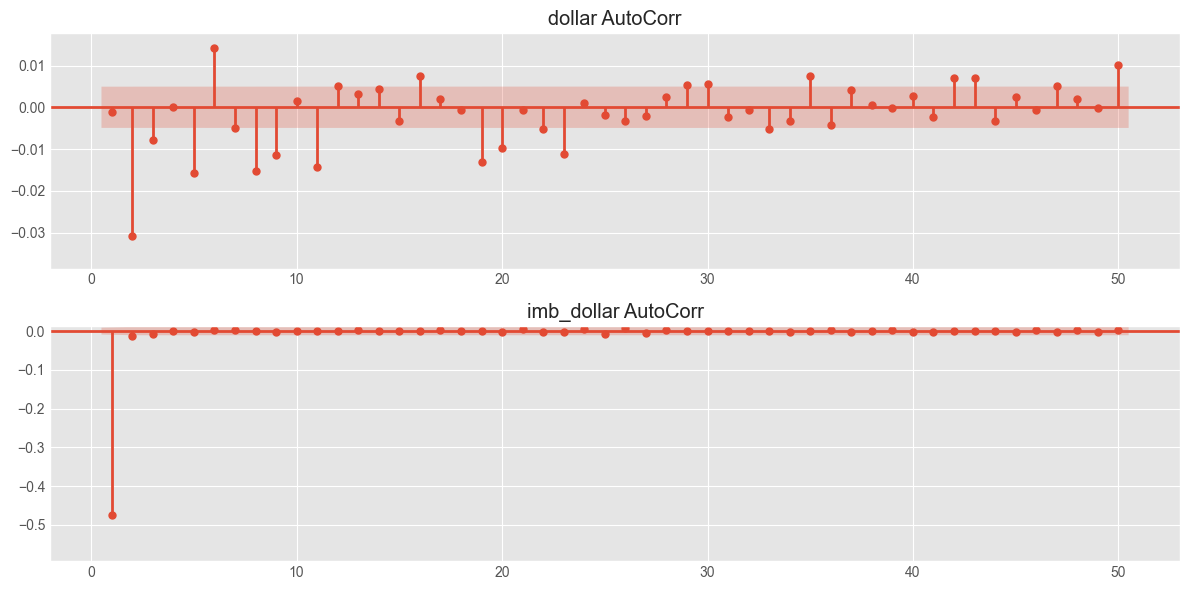

In [ ]:
bar_types = ['dollar', 'imb_dollar']
bar_returns = [dollar_returns, imb_dollar_returns]
plot_autocorr(bar_types, bar_returns)

In [ ]:
dollar_corr_df = pd.DataFrame(data={'dollar_autocorr':[dollar_returns.autocorr(), imb_dollar_returns.autocorr()]},\
                               index=['dollar', 'imb_dollar'])
dollar_corr_df

,dollar_autocorr
dollar,-0.001136
imb_dollar,-0.474676


2.4 Form E-mini S&P 500 futures dollar bars:

(a) Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).
(b) Now sample those bars using a CUSUM filter, where {} are returns and h = 0.05. How many samples do you get?
(c) Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?

(a) Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands to outside the bands).

In [ ]:
N=20
K=2
ma = dollar_bar.close.rolling(N).mean()
sigma = dollar_bar.close.rolling(N).std()
upper_band = ma + K*sigma
lower_band = ma - K*sigma

<AxesSubplot:xlabel='date_time'>

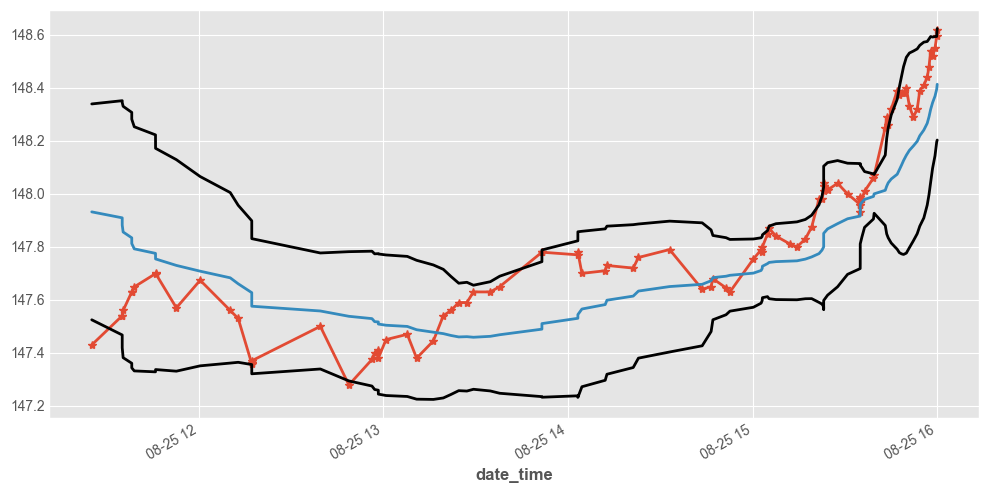

In [ ]:
fig, ax = plt.subplots(1)

dollar_bar.iloc[-100:].close.plot(ax=ax, marker='*')
ma.iloc[-100:].plot(ax=ax)
upper_band.iloc[-100:].plot(ax=ax, color='k')
lower_band.iloc[-100:].plot(ax=ax, color='k')


The exercise says compute Bollinger bands of width 5% around a rolling moving average.

In [ ]:
N=20
price_pct=0.05
ma = dollar_bar.close.rolling(N).mean()
upper_band = ma + K*price_pct
lower_band = ma - K*price_pct
bb_dataframe = pd.concat([dollar_bar.close, ma, upper_band, lower_band], axis=1).dropna()
bb_dataframe.columns = ['price', 'ma', 'upper_band', 'lower_band']

<AxesSubplot:xlabel='date_time'>

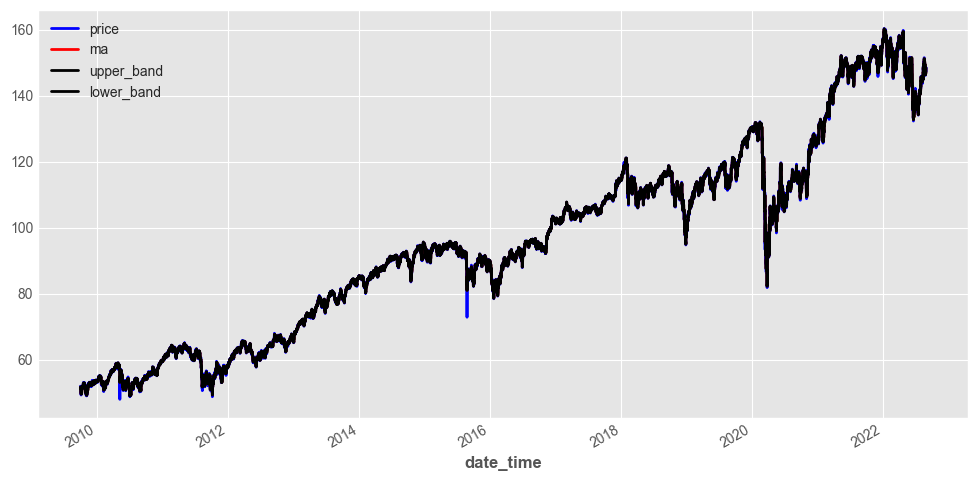

In [ ]:
fig, ax = plt.subplots(1)
bb_dataframe.plot(ax=ax, color = ['b', 'r', 'k', 'k'])

C:\Users\User\AppData\Local\Temp\ipykernel_18204\2920410734.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bb_dataframe['2022-03-21'].plot(ax=ax, color = ['b', 'r', 'k', 'k'])


<AxesSubplot:xlabel='date_time'>

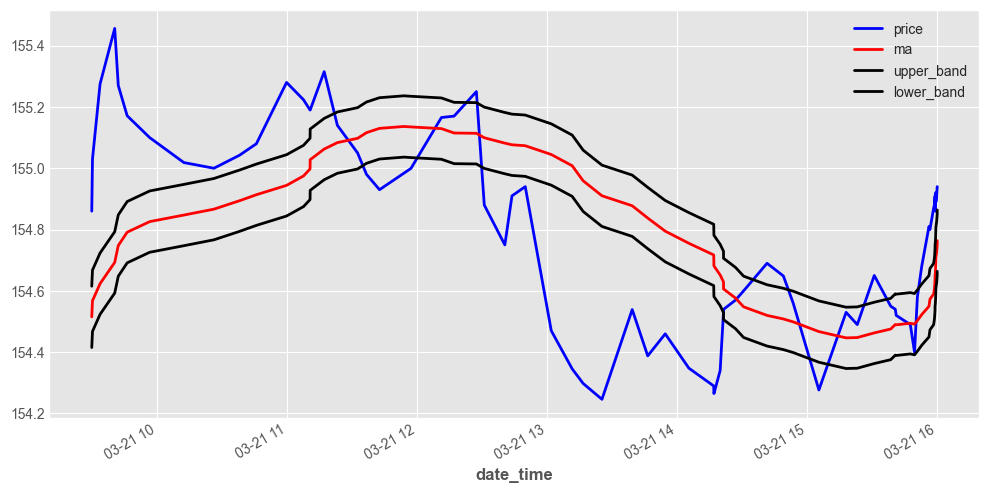

In [ ]:
fig, ax = plt.subplots(1)
bb_dataframe['2022-03-21'].plot(ax=ax, color = ['b', 'r', 'k', 'k'])

ount how many times prices cross the bands out (from within the bands to outside the bands).

In [ ]:
dollar_bar[dollar_bar.close > upper_band].shape

(53615, 9)

In [ ]:
dollar_bar[dollar_bar.close < lower_band].shape

(47622, 9)

In [ ]:
def get_up_cross(df):
  crit1 = df.price.shift(1) < df.upper_band.shift(1)
  crit2 = df.price > df.upper_band
  return df.price[crit1 & crit2]

def get_down_cross(df):
  crit1 = df.price.shift(1) > df.lower_band.shift(1)
  crit2 = df.price < df.lower_band
  return df.price[crit1 & crit2]

bb_up = get_up_cross(bb_dataframe)
bb_down = get_down_cross(bb_dataframe)

In [ ]:
print(bb_up.shape)
print(bb_down.shape)

(7526,)
(7179,)


C:\Users\User\AppData\Local\Temp\ipykernel_18204\3517232719.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bb_dataframe['2022-03-21'].plot(ax=ax, color = ['b', 'r', 'k', 'k'])


<AxesSubplot:xlabel='date_time'>

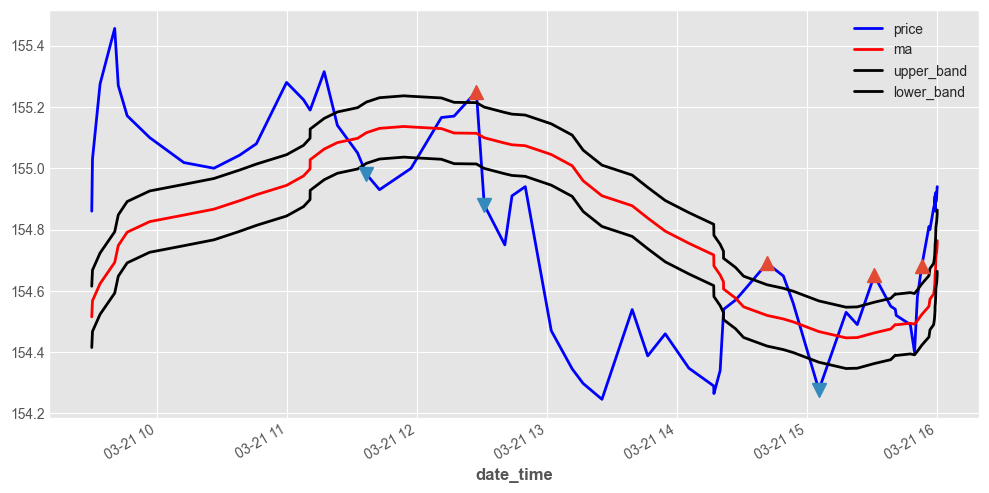

In [ ]:
fig, ax = plt.subplots(1)
bb_dataframe['2022-03-21'].plot(ax=ax, color = ['b', 'r', 'k', 'k'])
bb_up['2022-03-21'].plot(ax=ax, marker="^", ms= 10, ls='')
bb_down['2022-03-21'].plot(ax=ax, marker="v", ms= 10, ls='')

(b) Now sample those bars using a CUSUM filter, where {yt} are returns and h = 0.05. How many samples do you get?

In [ ]:
dollar_bar

In [ ]:
df_close = dollar_bar.close
df_close

date_time
2009-09-28 09:46:35     51.070
2009-09-28 09:53:49     51.130
2009-09-28 09:54:40     51.140
2009-09-28 10:00:38     51.210
2009-09-28 10:02:52     51.260
                        ...   
2022-08-25 15:57:52    148.540
2022-08-25 15:58:30    148.520
2022-08-25 15:59:17    148.550
2022-08-25 15:59:50    148.595
2022-08-25 16:00:00    148.620
Name: close, Length: 157821, dtype: float64

In [ ]:
cumsumIndex = ml.filters.cusum_filter(df_close, 0.01)

In [ ]:
cumsumIndex

DatetimeIndex(['2009-09-29 09:29:50', '2009-09-29 11:53:04',
               '2009-09-30 09:52:49', '2009-09-30 13:07:21',
               '2009-10-01 09:34:04', '2009-10-01 11:13:48',
               '2009-10-01 15:59:45', '2009-10-02 09:31:45',
               '2009-10-02 10:36:13', '2009-10-05 09:51:42',
               ...
               '2022-08-08 09:30:29', '2022-08-10 09:30:00',
               '2022-08-11 09:33:20', '2022-08-12 13:32:01',
               '2022-08-15 13:07:29', '2022-08-17 09:30:49',
               '2022-08-19 11:15:36', '2022-08-22 09:30:06',
               '2022-08-24 09:30:59', '2022-08-25 10:00:16'],
              dtype='datetime64[ns]', length=3553, freq=None)

In [ ]:
df_cumsum = df_close[cumsumIndex]
df_cumsum

2009-09-29 09:29:50     51.7500
2009-09-29 11:53:04     51.4320
2009-09-30 09:52:49     51.0300
2009-09-30 13:07:21     51.4700
2009-10-01 09:34:04     50.9300
                         ...   
2022-08-17 09:30:49    149.8100
2022-08-19 11:15:36    149.1000
2022-08-22 09:30:06    147.7200
2022-08-24 09:30:59    146.2035
2022-08-25 10:00:16    147.9000
Name: close, Length: 3600, dtype: float64

(c) Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?

In [ ]:
ma = df_cumsum.rolling(20).mean()
sigma = df_cumsum.rolling(20).std()

In [ ]:
print(sigma)

2009-09-29 09:29:50         NaN
2009-09-29 11:53:04         NaN
2009-09-30 09:52:49         NaN
2009-09-30 13:07:21         NaN
2009-10-01 09:34:04         NaN
                         ...   
2022-08-17 09:30:49    3.459169
2022-08-19 11:15:36    3.355315
2022-08-22 09:30:06    3.226374
2022-08-24 09:30:59    2.953836
2022-08-25 10:00:16    2.794334
Name: close, Length: 3600, dtype: float64
